In [1]:
#Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline




In [2]:
#Load the dataset
df_crime = pd.read_csv('crime_data_chicago.csv')



In [3]:
df_crime.shape #Checking the size of the data

(2278726, 23)

In [4]:
df_crime.columns #Checking columns

Index(['Unnamed: 0', 'ID', 'Case Number', 'Date', 'Block', 'IUCR',
       'Primary Type', 'Description', 'Location Description', 'Arrest',
       'Domestic', 'Beat', 'District', 'Ward', 'Community Area', 'FBI Code',
       'X Coordinate', 'Y Coordinate', 'Year', 'Updated On', 'Latitude',
       'Longitude', 'Location'],
      dtype='object')

In [5]:
df_crime.dtypes #Checking data types

Unnamed: 0                int64
ID                        int64
Case Number              object
Date                     object
Block                    object
IUCR                     object
Primary Type             object
Description              object
Location Description     object
Arrest                     bool
Domestic                   bool
Beat                      int64
District                float64
Ward                    float64
Community Area          float64
FBI Code                 object
X Coordinate            float64
Y Coordinate            float64
Year                      int64
Updated On               object
Latitude                float64
Longitude               float64
Location                 object
dtype: object

In [6]:
df_crime.describe()

,Unnamed: 0,ID,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude
count,2.278726e+06,2.278726e+06,2.278726e+06,2.278714e+06,2.094031e+06,2.094459e+06,2.254741e+06,2.254741e+06,2.278726e+06,2.254741e+06,2.254741e+06
mean,1.139362e+06,6.882068e+06,1.186442e+03,1.129072e+01,2.272764e+01,3.752140e+01,1.164569e+06,1.885747e+06,2.009638e+03,4.184209e+01,-8.767161e+01
std,6.578117e+05,3.419168e+06,7.026836e+02,6.946692e+00,1.383464e+01,2.153282e+01,1.673955e+04,3.209855e+04,6.019724e+00,8.830434e-02,6.073538e-02
min,0.000000e+00,6.370000e+02,1.110000e+02,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.001000e+03,3.661945e+01,-9.168657e+01
25%,5.696812e+05,3.716076e+06,6.210000e+02,6.000000e+00,1.000000e+01,2.300000e+01,1.152948e+06,1.859053e+06,2.004000e+03,4.176866e+01,-8.771379e+01
50%,1.139362e+06,6.885990e+06,1.034000e+03,1.000000e+01,2.300000e+01,3.200000e+01,1.166060e+06,1.890673e+06,2.009000e+03,4.185578e+01,-8.766597e+01
75%,1.709044e+06,9.887568e+06,1.731000e+03,1.700000e+01,3.400000e+01,5.700000e+01,1.176365e+06,1.909219e+06,2.014000e+03,4.190668e+01,-8.762823e+01
max,2.278725e+06,1.278199e+07,2.535000e+03,3.100000e+01,5.000000e+01,7.700000e+01,1.205119e+06,1.951622e+06,2.022000e+03,4.202291e+01,-8.752453e+01


### Data cleaning / Preparation

In [7]:
df = df_crime[[#'Unnamed: 0',
      #'ID',
    'Case Number', 'Date', #'Block',
    'IUCR',
       'Primary Type', 'Description', 'Location Description', 'Arrest',
       'Domestic', 'Beat', 'District', 'Ward', 'Community Area',
    'FBI Code',
       #'X Coordinate', 'Y Coordinate',
    'Year', #'Updated On',
           'Latitude',
   'Longitude', 'Location'
       ]] # Using filtering method to drop redundant columns

In [8]:
df.head()

,Case Number,Date,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,Year,Latitude,Longitude,Location
0,HP485721,07/26/2008 02:30:00 PM,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,423,4.0,10.0,46.0,14,2008,41.739980,-87.555120,"(41.739979622, -87.555120042)"
1,JB372830,07/31/2018 10:57:00 AM,143C,WEAPONS VIOLATION,UNLAWFUL POSS AMMUNITION,POOL ROOM,True,False,413,4.0,8.0,47.0,15,2018,41.726922,-87.599747,"(41.726922145, -87.599746995)"
2,HN308568,04/27/2007 10:30:00 AM,0610,BURGLARY,FORCIBLE ENTRY,RESIDENCE,True,False,1711,17.0,39.0,12.0,05,2007,41.994138,-87.734959,"(41.994137622, -87.734959049)"
3,JB361368,07/23/2018 08:55:00 AM,0560,ASSAULT,SIMPLE,NURSING HOME/RETIREMENT HOME,False,False,1115,11.0,28.0,26.0,08A,2018,41.881217,-87.730590,"(41.881217483, -87.730589961)"
4,JE297624,07/11/2021 06:40:00 AM,051A,ASSAULT,AGGRAVATED - HANDGUN,PARKING LOT / GARAGE (NON RESIDENTIAL),False,False,1231,12.0,27.0,28.0,04A,2021,41.874174,-87.668082,"(41.874173691, -87.668082118)"


# Descriptive Analysis

In [9]:
df.dtypes

Case Number              object
Date                     object
IUCR                     object
Primary Type             object
Description              object
Location Description     object
Arrest                     bool
Domestic                   bool
Beat                      int64
District                float64
Ward                    float64
Community Area          float64
FBI Code                 object
Year                      int64
Latitude                float64
Longitude               float64
Location                 object
dtype: object

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2278726 entries, 0 to 2278725
Data columns (total 17 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Case Number           object 
 1   Date                  object 
 2   IUCR                  object 
 3   Primary Type          object 
 4   Description           object 
 5   Location Description  object 
 6   Arrest                bool   
 7   Domestic              bool   
 8   Beat                  int64  
 9   District              float64
 10  Ward                  float64
 11  Community Area        float64
 12  FBI Code              object 
 13  Year                  int64  
 14  Latitude              float64
 15  Longitude             float64
 16  Location              object 
dtypes: bool(2), float64(5), int64(2), object(8)
memory usage: 265.1+ MB


In [11]:
df.isna().sum() #Checking for missing values

Case Number                  1
Date                         0
IUCR                         0
Primary Type                 0
Description                  0
Location Description      2877
Arrest                       0
Domestic                     0
Beat                         0
District                    12
Ward                    184695
Community Area          184267
FBI Code                     0
Year                         0
Latitude                 23985
Longitude                23985
Location                 23985
dtype: int64

In [12]:
df = df.dropna(axis=0) #dropping missing values (rows)

In [13]:
df.isna().sum() # Our dataframe is now free of missing values

Case Number             0
Date                    0
IUCR                    0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
Ward                    0
Community Area          0
FBI Code                0
Year                    0
Latitude                0
Longitude               0
Location                0
dtype: int64

In [14]:
df.shape

(2070581, 17)

In [15]:
df

,Case Number,Date,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,Year,Latitude,Longitude,Location
0,HP485721,07/26/2008 02:30:00 PM,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,423,4.0,10.0,46.0,14,2008,41.739980,-87.555120,"(41.739979622, -87.555120042)"
1,JB372830,07/31/2018 10:57:00 AM,143C,WEAPONS VIOLATION,UNLAWFUL POSS AMMUNITION,POOL ROOM,True,False,413,4.0,8.0,47.0,15,2018,41.726922,-87.599747,"(41.726922145, -87.599746995)"
2,HN308568,04/27/2007 10:30:00 AM,0610,BURGLARY,FORCIBLE ENTRY,RESIDENCE,True,False,1711,17.0,39.0,12.0,05,2007,41.994138,-87.734959,"(41.994137622, -87.734959049)"
3,JB361368,07/23/2018 08:55:00 AM,0560,ASSAULT,SIMPLE,NURSING HOME/RETIREMENT HOME,False,False,1115,11.0,28.0,26.0,08A,2018,41.881217,-87.730590,"(41.881217483, -87.730589961)"
4,JE297624,07/11/2021 06:40:00 AM,051A,ASSAULT,AGGRAVATED - HANDGUN,PARKING LOT / GARAGE (NON RESIDENTIAL),False,False,1231,12.0,27.0,28.0,04A,2021,41.874174,-87.668082,"(41.874173691, -87.668082118)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2278720,HP714246,12/03/2008 05:30:00 AM,0810,THEFT,OVER $500,VEHICLE NON-COMMERCIAL,False,False,1633,16.0,38.0,15.0,06,2008,41.944038,-87.767774,"(41.944038314, -87.767774454)"
2278721,HZ474139,10/14/2016 02:35:00 PM,0560,ASSAULT,SIMPLE,CONVENIENCE STORE,True,False,1832,18.0,42.0,8.0,08A,2016,41.893647,-87.631177,"(41.893646656, -87.631177143)"
2278723,HM342705,05/10/2006 07:49:00 PM,0560,ASSAULT,SIMPLE,APARTMENT,False,True,213,2.0,4.0,38.0,08A,2006,41.822727,-87.607863,"(41.82272748, -87.607863136)"
2278724,JA476827,10/18/2017 10:30:00 PM,1360,CRIMINAL TRESPASS,TO VEHICLE,PARKING LOT/GARAGE(NON.RESID.),False,False,1831,18.0,42.0,8.0,26,2017,41.893984,-87.634677,"(41.893983593, -87.634677382)"


In [16]:
# Checking for duplicates
df.duplicated()

0          False
1          False
2          False
3          False
4          False
           ...  
2278720    False
2278721    False
2278723    False
2278724    False
2278725    False
Length: 2070581, dtype: bool

In [17]:
df.loc[df.duplicated(subset= ["Case Number", "Date"])]

,Case Number,Date,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,Year,Latitude,Longitude,Location
292311,HM763064,12/08/2006 03:14:00 PM,0110,HOMICIDE,FIRST DEGREE MURDER,OFFICE,True,False,111,1.0,42.0,28.0,01A,2006,41.881884,-87.640060,"(41.881883933, -87.640060441)"
322750,HS313197,05/18/2010 06:37:00 AM,0110,HOMICIDE,FIRST DEGREE MURDER,AUTO,True,False,911,9.0,14.0,58.0,01A,2010,41.805186,-87.702166,"(41.805185857, -87.702166016)"
477865,HK172551,02/08/2004 11:44:00 PM,0110,HOMICIDE,FIRST DEGREE MURDER,CHURCH,False,False,1123,11.0,28.0,27.0,01A,2004,41.880909,-87.711843,"(41.880908996, -87.711842908)"
502351,HK172551,02/08/2004 11:44:00 PM,0110,HOMICIDE,FIRST DEGREE MURDER,CHURCH,False,False,1123,11.0,28.0,27.0,01A,2004,41.880909,-87.711843,"(41.880908996, -87.711842908)"
594160,HZ403466,08/23/2016 01:34:00 AM,0110,HOMICIDE,FIRST DEGREE MURDER,APARTMENT,True,False,422,4.0,7.0,46.0,01A,2016,41.747543,-87.563739,"(41.747543344, -87.563739255)"
610916,HJ756295,11/13/2003 09:25:00 AM,0110,HOMICIDE,FIRST DEGREE MURDER,GARAGE/AUTO REPAIR,False,False,1013,10.0,22.0,29.0,01A,2003,41.846547,-87.737610,"(41.846547494, -87.737609902)"
1504827,HZ140230,02/04/2016 01:00:00 PM,0110,HOMICIDE,FIRST DEGREE MURDER,HOUSE,True,False,824,8.0,16.0,63.0,01A,2016,41.789518,-87.693680,"(41.789518444, -87.693680468)"
1564062,JA185074,03/13/2017 04:44:00 PM,0110,HOMICIDE,FIRST DEGREE MURDER,AUTO,False,False,613,6.0,21.0,71.0,01A,2017,41.737042,-87.655803,"(41.737041597, -87.655803482)"
1858634,HZ303764,06/12/2016 01:45:00 AM,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,False,False,2221,22.0,21.0,73.0,01A,2016,41.729302,-87.664087,"(41.72930178, -87.664087366)"
1989013,HR146859,01/31/2009 01:10:00 AM,0110,HOMICIDE,FIRST DEGREE MURDER,APARTMENT,True,False,1712,17.0,39.0,14.0,01A,2009,41.971903,-87.726290,"(41.971902506, -87.726290051)"


In [18]:
df.loc[502351]

Case Number                                  HK172551
Date                           02/08/2004 11:44:00 PM
IUCR                                             0110
Primary Type                                 HOMICIDE
Description                       FIRST DEGREE MURDER
Location Description                           CHURCH
Arrest                                          False
Domestic                                        False
Beat                                             1123
District                                         11.0
Ward                                             28.0
Community Area                                   27.0
FBI Code                                          01A
Year                                             2004
Latitude                                    41.880909
Longitude                                  -87.711843
Location                (41.880908996, -87.711842908)
Name: 502351, dtype: object

In [19]:
#Dropping duplicated row
df = df.drop(index=502351)

In [20]:
df.reset_index(drop=True)

,Case Number,Date,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,Year,Latitude,Longitude,Location
0,HP485721,07/26/2008 02:30:00 PM,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,423,4.0,10.0,46.0,14,2008,41.739980,-87.555120,"(41.739979622, -87.555120042)"
1,JB372830,07/31/2018 10:57:00 AM,143C,WEAPONS VIOLATION,UNLAWFUL POSS AMMUNITION,POOL ROOM,True,False,413,4.0,8.0,47.0,15,2018,41.726922,-87.599747,"(41.726922145, -87.599746995)"
2,HN308568,04/27/2007 10:30:00 AM,0610,BURGLARY,FORCIBLE ENTRY,RESIDENCE,True,False,1711,17.0,39.0,12.0,05,2007,41.994138,-87.734959,"(41.994137622, -87.734959049)"
3,JB361368,07/23/2018 08:55:00 AM,0560,ASSAULT,SIMPLE,NURSING HOME/RETIREMENT HOME,False,False,1115,11.0,28.0,26.0,08A,2018,41.881217,-87.730590,"(41.881217483, -87.730589961)"
4,JE297624,07/11/2021 06:40:00 AM,051A,ASSAULT,AGGRAVATED - HANDGUN,PARKING LOT / GARAGE (NON RESIDENTIAL),False,False,1231,12.0,27.0,28.0,04A,2021,41.874174,-87.668082,"(41.874173691, -87.668082118)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2070575,HP714246,12/03/2008 05:30:00 AM,0810,THEFT,OVER $500,VEHICLE NON-COMMERCIAL,False,False,1633,16.0,38.0,15.0,06,2008,41.944038,-87.767774,"(41.944038314, -87.767774454)"
2070576,HZ474139,10/14/2016 02:35:00 PM,0560,ASSAULT,SIMPLE,CONVENIENCE STORE,True,False,1832,18.0,42.0,8.0,08A,2016,41.893647,-87.631177,"(41.893646656, -87.631177143)"
2070577,HM342705,05/10/2006 07:49:00 PM,0560,ASSAULT,SIMPLE,APARTMENT,False,True,213,2.0,4.0,38.0,08A,2006,41.822727,-87.607863,"(41.82272748, -87.607863136)"
2070578,JA476827,10/18/2017 10:30:00 PM,1360,CRIMINAL TRESPASS,TO VEHICLE,PARKING LOT/GARAGE(NON.RESID.),False,False,1831,18.0,42.0,8.0,26,2017,41.893984,-87.634677,"(41.893983593, -87.634677382)"


Univariate and Multivariate Analysis

Text(0, 0.5, 'Counts')

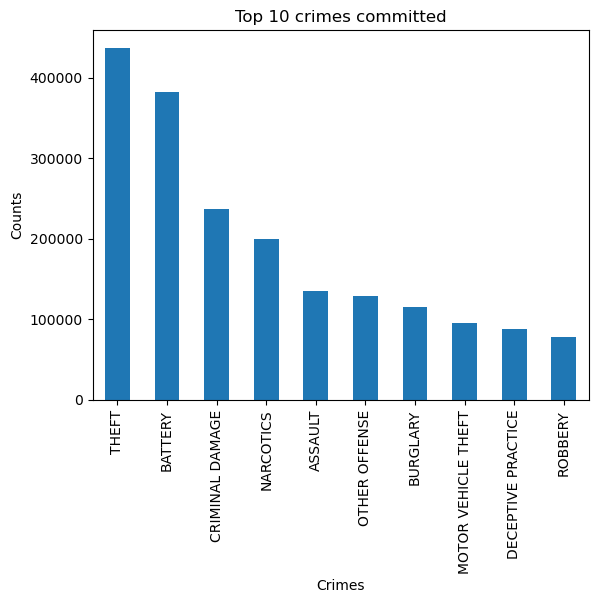

In [21]:
#Top 10 crimes committed
ax = df["Primary Type"].value_counts().head(10).plot(kind = "bar", title= "Top 10 crimes committed") # Saving as matplotlib
ax.set_xlabel("Crimes") #labelling x-axis
ax.set_ylabel("Counts") #labelling y-axis

In [22]:
#What cases of primary types led to arrests
arrest_primary = df[df['Arrest'] == True].groupby('Primary Type').size()
arrest_primary


Primary Type
ARSON                                   411
ASSAULT                               29224
BATTERY                               84484
BURGLARY                               6368
CONCEALED CARRY LICENSE VIOLATION       296
CRIM SEXUAL ASSAULT                    1078
CRIMINAL DAMAGE                       15797
CRIMINAL SEXUAL ASSAULT                 105
CRIMINAL TRESPASS                     40479
DECEPTIVE PRACTICE                    11899
GAMBLING                               3961
HOMICIDE                               1645
HUMAN TRAFFICKING                         3
INTERFERENCE WITH PUBLIC OFFICER       4900
INTIMIDATION                            181
KIDNAPPING                              182
LIQUOR LAW VIOLATION                   3805
MOTOR VEHICLE THEFT                    7787
NARCOTICS                            198288
NON - CRIMINAL                            2
NON-CRIMINAL                              6
OBSCENITY                               147
OFFENSE INVOLVING C

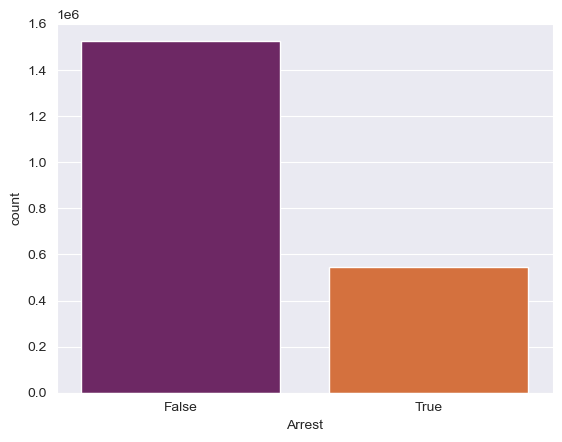

In [23]:
#Visualizing arrests and non-arrest
sns.set_style("darkgrid")
sns.countplot(x="Arrest", palette='inferno', data=df);

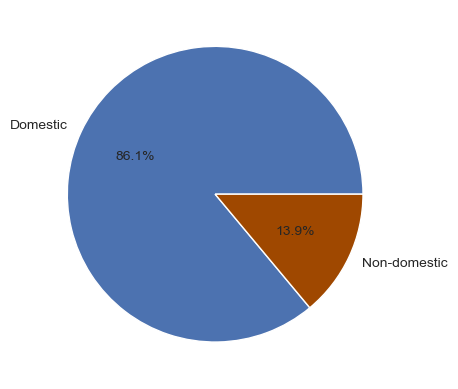

In [49]:
df_domestic = df.Domestic.value_counts()

sns.set_style("whitegrid")

colors = [sns.color_palette('deep')[0],
          sns.color_palette('bright')[5]]

#create pie chart
plt.pie(df_domestic, labels = ["Domestic", "Non-domestic"], 
        colors = colors, autopct='%.1f%%')
plt.show()


In [24]:
#Most arrests cases by primary type
arrest_primary = df[df['Arrest'] == True]['Primary Type']
max_primary_type = arrest_primary.value_counts().idxmax()
max_arrest_count = arrest_primary.value_counts().max()
print(f'The most cases of arrests is {max_arrest_count} for {max_primary_type}')


The most cases of arrests is 198288 for NARCOTICS


In [26]:
#The top 5 primary types which did not lead to arrests
non_arrests = df_crime [df_crime['Arrest']== False].groupby ('Primary Type').size()
top_5 = non_arrests.sort_values(ascending = False)
top_5

Primary Type
THEFT                                425139
BATTERY                              326028
CRIMINAL DAMAGE                      242333
BURGLARY                             118163
OTHER OFFENSE                        116601
ASSAULT                              115638
MOTOR VEHICLE THEFT                   96695
DECEPTIVE PRACTICE                    85601
ROBBERY                               77623
CRIMINAL TRESPASS                     18756
OFFENSE INVOLVING CHILDREN            13007
WEAPONS VIOLATION                      7521
CRIM SEXUAL ASSAULT                    7064
SEX OFFENSE                            6375
PUBLIC PEACE VIOLATION                 5585
ARSON                                  3415
KIDNAPPING                             1939
HOMICIDE                               1886
CRIMINAL SEXUAL ASSAULT                1466
NARCOTICS                              1333
INTIMIDATION                           1183
STALKING                               1134
INTERFERENCE WITH P

In [27]:
#What types of crimes occured at location description "street"
street_crimes = df_crime[df_crime['Location Description'] == 'STREET'].groupby('Primary Type').size()
street_crimes

Primary Type
ARSON                                   255
ASSAULT                               30303
BATTERY                               72549
BURGLARY                                375
CONCEALED CARRY LICENSE VIOLATION       111
CRIM SEXUAL ASSAULT                     384
CRIMINAL DAMAGE                       93261
CRIMINAL SEXUAL ASSAULT                  65
CRIMINAL TRESPASS                      3213
DECEPTIVE PRACTICE                     6448
GAMBLING                                525
HOMICIDE                               1808
HUMAN TRAFFICKING                         4
INTERFERENCE WITH PUBLIC OFFICER       2711
INTIMIDATION                            223
KIDNAPPING                              597
LIQUOR LAW VIOLATION                    812
MOTOR VEHICLE THEFT                   82624
NARCOTICS                             79096
NON - CRIMINAL                            1
NON-CRIMINAL                              8
OBSCENITY                                12
OFFENSE INVOLVING C

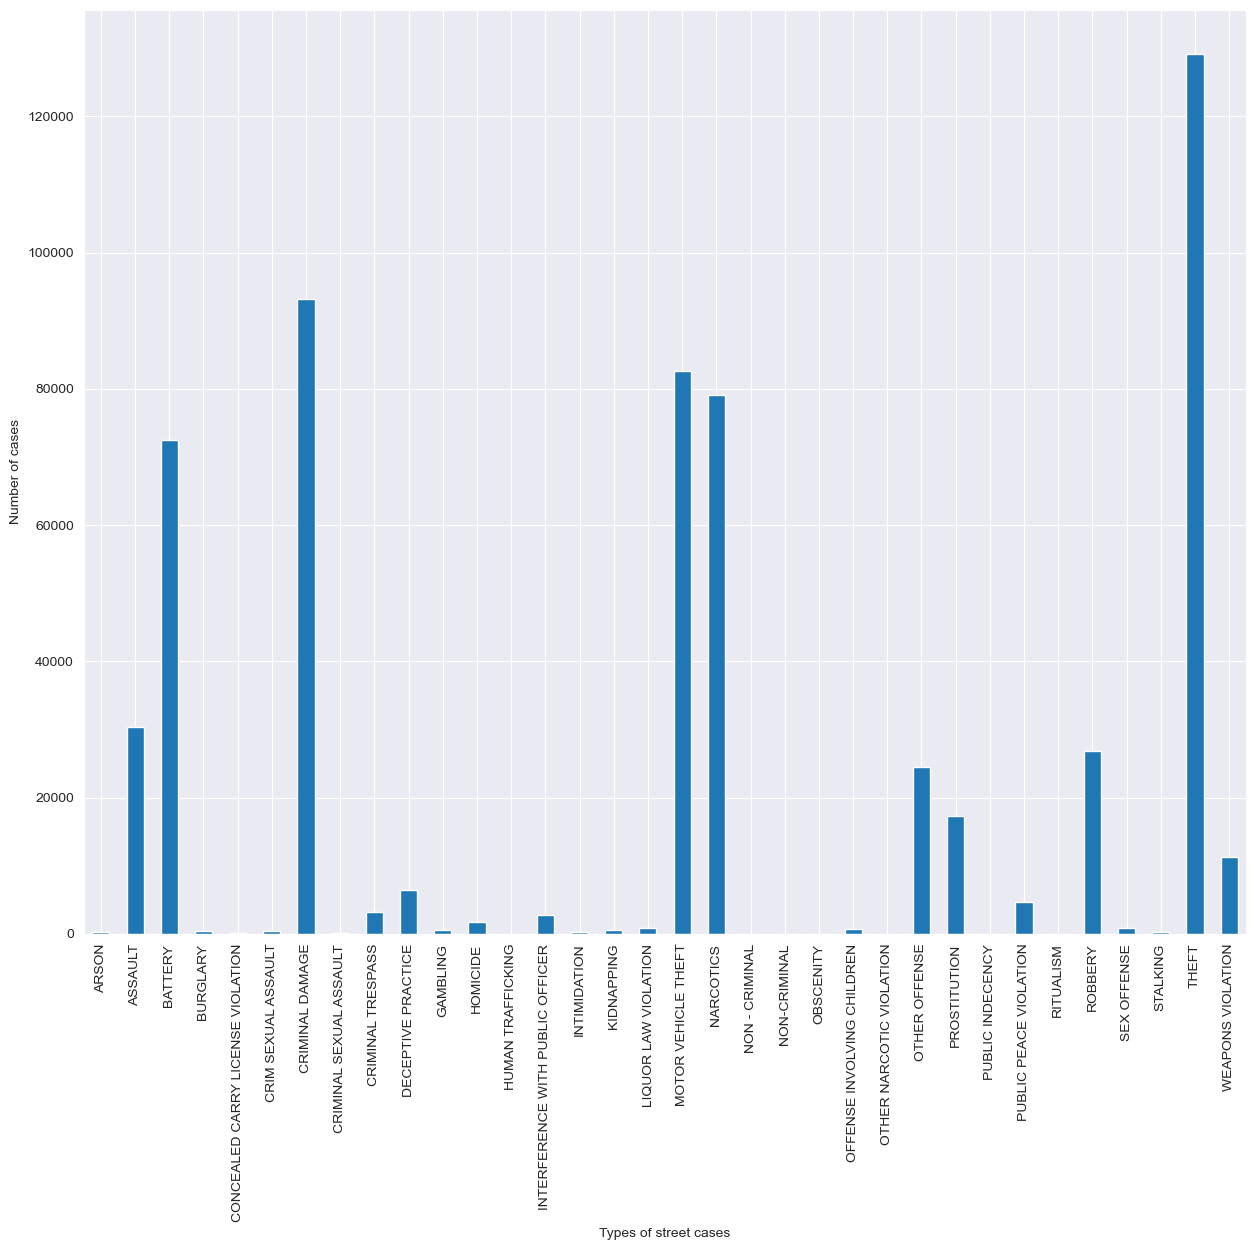

In [28]:
#Visualization of the primary type cases which occurs in the street
street_crimes = df_crime[df_crime['Location Description'] == 'STREET'].groupby('Primary Type').size()
plt.figure(figsize = (15,12))
street_crimes.plot(kind = 'bar')
plt.xlabel ('Types of street cases')
plt.ylabel ('Number of cases')
plt.show()

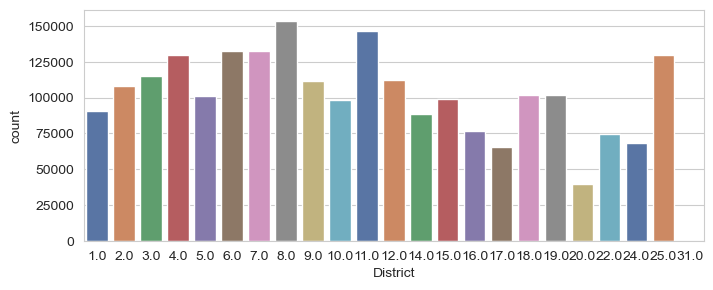

In [56]:
#Visualizing crimes per district
f = plt.figure(figsize=(8, 3))
sns.set_style("whitegrid")
sns.countplot(x=df["District"], palette='deep');

# How crime rates change with year

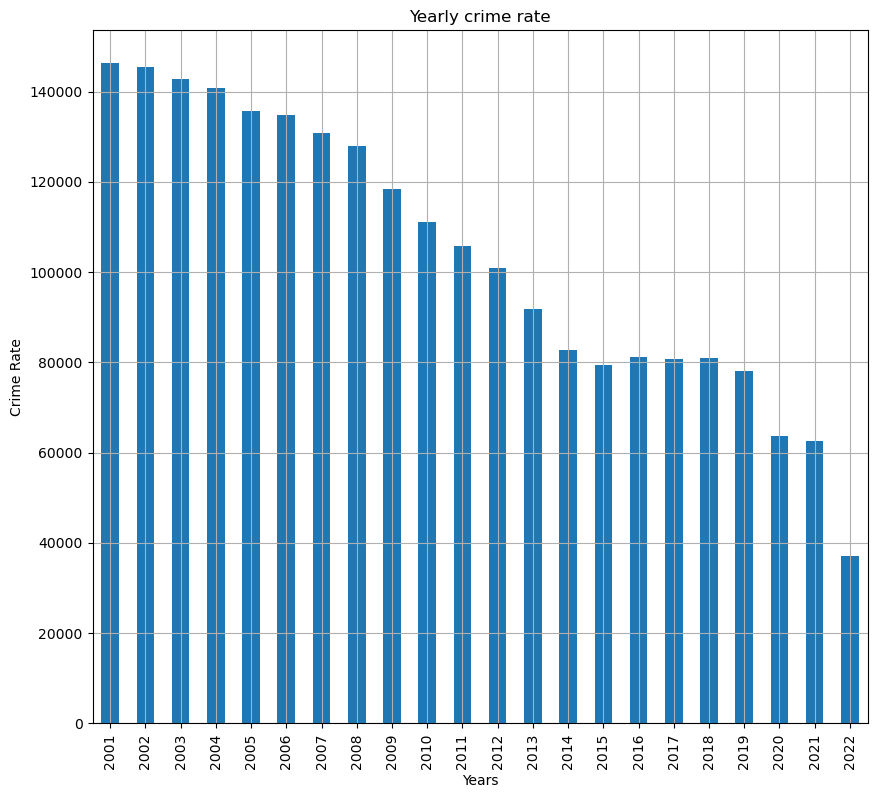

In [29]:
yearly_crime_rate = df_crime.groupby('Year').size()

plt.figure (figsize = (10,9))
yearly_crime_rate.plot(kind = 'bar')
plt.title('Yearly crime rate')
plt.xlabel('Years')
plt.ylabel('Crime Rate')
plt.grid(True)
plt.show()

# Arrests Rate

In [37]:
yearly_arrests = df_crime[df_crime['Arrest'] == True].groupby ('Year').size()

<function matplotlib.pyplot.show(close=None, block=None)>

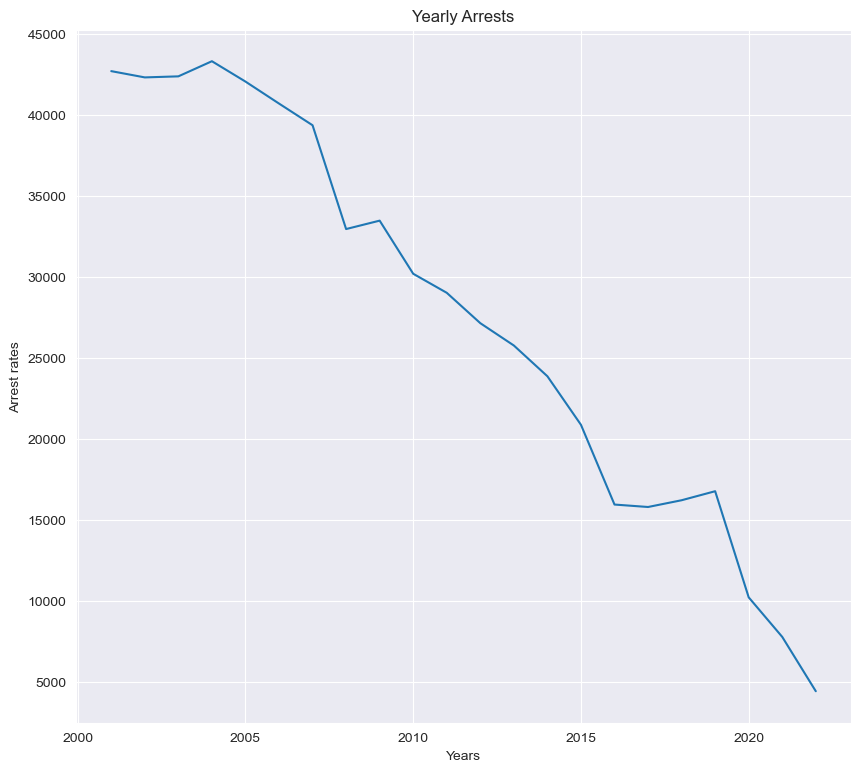

In [38]:
plt.figure (figsize=(10,9))
yearly_arrests.plot(kind = 'line')
plt.title('Yearly Arrests')
plt.xlabel ('Years')
plt.ylabel ('Arrest rates')
plt.grid (True)
plt.show

# Chloropleth Map showing map crime rate

In [ ]:
!pip install folium --user

In [4]:
import folium

In [2]:
!pip install geopandas --user


     ---------------------------------------- 0.0/51.5 kB ? eta -:--:--
     ------- -------------------------------- 10.2/51.5 kB ? eta -:--:--
     ------- -------------------------------- 10.2/51.5 kB ? eta -:--:--
     ------- -------------------------------- 10.2/51.5 kB ? eta -:--:--
     --------------- ----------------------- 20.5/51.5 kB 93.1 kB/s eta 0:00:01
     --------------- ----------------------- 20.5/51.5 kB 93.1 kB/s eta 0:00:01
     ---------------------- --------------- 30.7/51.5 kB 100.9 kB/s eta 0:00:01
     ------------------------------ ------- 41.0/51.5 kB 122.9 kB/s eta 0:00:01
     -------------------------------------- 51.5/51.5 kB 131.9 kB/s eta 0:00:00
   ---------------------------------------- 0.0/1.1 MB ? eta -:--:--
   - -------------------------------------- 0.0/1.1 MB 1.4 MB/s eta 0:00:01
   -- ------------------------------------- 0.1/1.1 MB 825.8 kB/s eta 0:00:02
   -- ------------------------------------- 0.1/1.1 MB 825.8 kB/s eta 0:00:02
   --- -

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [5]:
import geopandas as gpd


In [6]:
chicago_geojson = gpd.read_file(r'C:\Users\Chidinma\Music\chicago-community-areas.geojson')

In [8]:
chicago_geojson.head()

,community,area,shape_area,perimeter,area_num_1,area_numbe,comarea_id,comarea,shape_len,geometry
0,DOUGLAS,0,46004621.1581,0,35,35,0,0,31027.0545098,"MULTIPOLYGON (((-87.60914 41.84469, -87.60915 ..."
1,OAKLAND,0,16913961.0408,0,36,36,0,0,19565.5061533,"MULTIPOLYGON (((-87.59215 41.81693, -87.59231 ..."
2,FULLER PARK,0,19916704.8692,0,37,37,0,0,25339.0897503,"MULTIPOLYGON (((-87.62880 41.80189, -87.62879 ..."
3,GRAND BOULEVARD,0,48492503.1554,0,38,38,0,0,28196.8371573,"MULTIPOLYGON (((-87.60671 41.81681, -87.60670 ..."
4,KENWOOD,0,29071741.9283,0,39,39,0,0,23325.1679062,"MULTIPOLYGON (((-87.59215 41.81693, -87.59215 ..."


In [9]:
merged_df = chicago_geojson.merge(df_crime, how='left', left_on='geometry', right_on='Location')


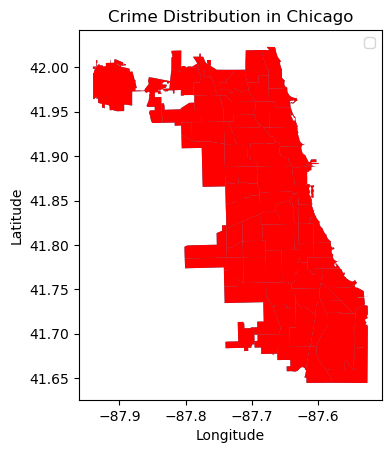

In [10]:
#Visualizing crime across Chicago
# Assuming chicago_geojson is the GeoJSON data and df_crime is the merged DataFrame
# Plot the GeoJSON data
chicago_geojson.plot()

# Plot the crime data on top of the GeoJSON map
merged_df.plot(ax=plt.gca(), color='red', markersize=5)

# Customize plot
plt.title('Crime Distribution in Chicago')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(['Community Areas', 'Crime Incidents'])

# Show plot
plt.show()

#The map shows crime distribution in Chicago